In [1]:
import pandas as pd

In [2]:
results = pd.read_csv("ref129_with_ml_pred_TOT.csv")

In [8]:
print(results['deriv_cog_impair'].value_counts(dropna=False))
print("\n", results['TOT_ml_pred_cog_score'].value_counts(dropna=False), sep="")

deriv_cog_impair
0.0    12366
NaN     8257
1.0     6465
Name: count, dtype: int64

TOT_ml_pred_cog_score
0.0    21395
1.0     5693
Name: count, dtype: int64


In [9]:
# for the rows where deriv_cog_impair value is available, how do the results compare?
res_no_na = results.copy()
res_no_na = results.dropna(subset=['deriv_cog_impair'])

print(res_no_na['deriv_cog_impair'].value_counts(dropna=False))
print("\n", res_no_na['TOT_ml_pred_cog_score'].value_counts(dropna=False), sep="")

deriv_cog_impair
0.0    12366
1.0     6465
Name: count, dtype: int64

TOT_ml_pred_cog_score
0.0    13159
1.0     5672
Name: count, dtype: int64


- 0.0 is over-represented
- 1.0 is under-represented
- model may be biased towards 0.0 type output since there is a big class balance in the input dataset

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

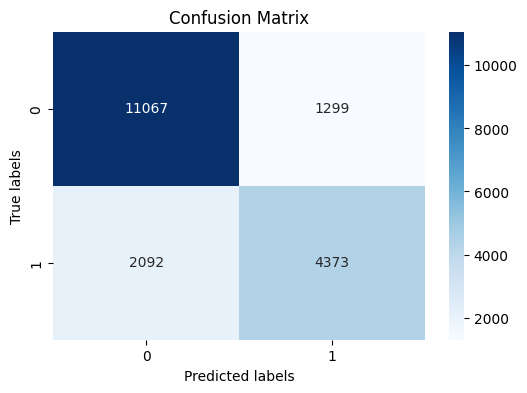

In [12]:
# Calculate confusion matrix
cm = confusion_matrix(res_no_na['deriv_cog_impair'], res_no_na['TOT_ml_pred_cog_score'])

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()